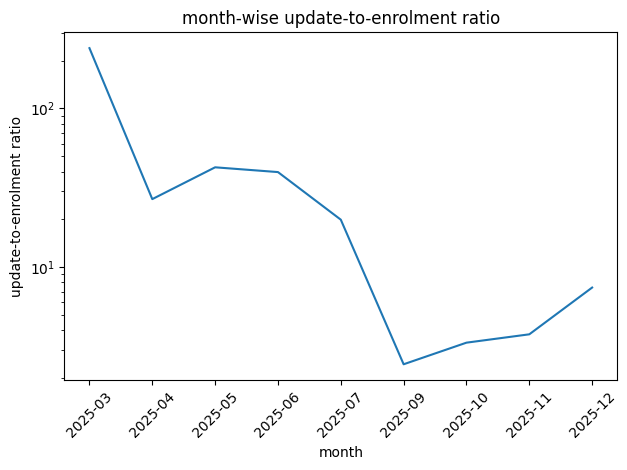

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

enrolment_df["month"]=pd.to_datetime(enrolment_df["date"]).dt.to_period("M").astype(str)
updates=pd.concat([demographic_df,biometric_df])
updates["month"]=pd.to_datetime(updates["date"]).dt.to_period("M").astype(str)

month_enrolments=enrolment_df.groupby("month").size()
month_updates=updates.groupby("month").size()

ratio=(month_updates/month_enrolments).dropna().sort_index()

plt.figure()
plt.plot(ratio.index,ratio.values)
plt.xticks(rotation=45)
plt.xlabel("month")
plt.yscale("log")
plt.ylabel("update-to-enrolment ratio")
plt.title("month-wise update-to-enrolment ratio")
plt.tight_layout()
plt.show()


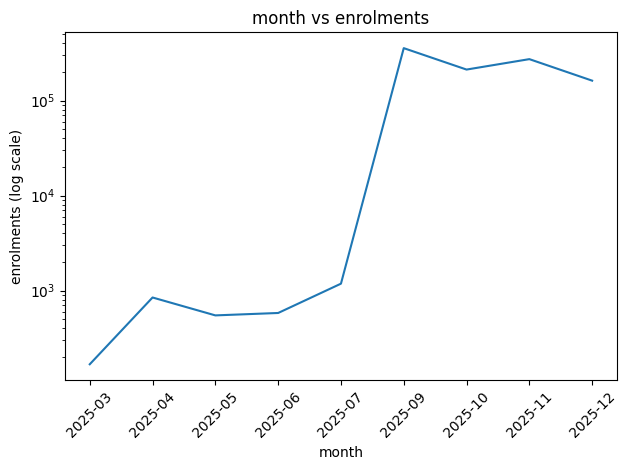

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")

# convert date to month
enrolment_df["month"]=pd.to_datetime(enrolment_df["date"]).dt.to_period("M").astype(str)

# month-wise enrolments
month_enrolments=(
    enrolment_df
    .groupby("month")
    .size()
    .sort_index()
)

# plot
plt.figure()
plt.plot(month_enrolments.index,month_enrolments.values)
plt.yscale("log")  # important because of scale imbalance
plt.xticks(rotation=45)
plt.xlabel("month")
plt.ylabel("enrolments (log scale)")
plt.title("month vs enrolments")
plt.tight_layout()
plt.show()


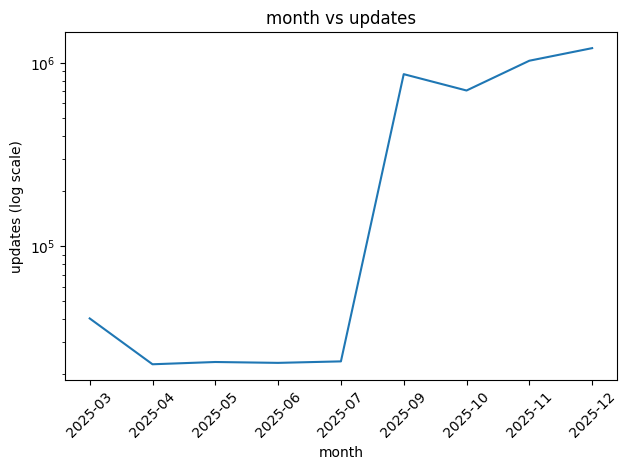

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

# combine updates
updates=pd.concat([demographic_df,biometric_df])

# convert date to month
updates["month"]=pd.to_datetime(updates["date"]).dt.to_period("M").astype(str)

# month-wise updates
month_updates=(
    updates
    .groupby("month")
    .size()
    .sort_index()
)

# plot
plt.figure()
plt.plot(month_updates.index,month_updates.values)
plt.yscale("log")  # same scale logic as enrolments
plt.xticks(rotation=45)
plt.xlabel("month")
plt.ylabel("updates (log scale)")
plt.title("month vs updates")
plt.tight_layout()
plt.show()
